In [1]:
import geopandas as gpd 
import matplotlib.pyplot as plt

df = gpd.read_file('../formatted_SA2.geojson')

In [2]:
import pandas as pd 
main_table = pd.read_csv("Caravan") 
main_table.head()

,Time,Value,Code,Area
0,2013,12.0,127031522,Casula
1,2014,13.0,127031522,Casula
2,2015,18.0,127031522,Casula
3,2016,24.0,127031522,Casula
4,2017,27.0,127031522,Casula


In [3]:
main_table=main_table[main_table.Time == 2016]
main_table.head()

,Time,Value,Code,Area
3,2016,24.0,127031522,Casula
9,2016,18.0,118011340,Bondi Beach - North Bondi
15,2016,25.0,115011558,Cherrybrook
21,2016,25.0,121021403,Asquith - Mount Colah
27,2016,19.0,120021388,Leichhardt - Annandale


In [4]:
df = df[['sa2_maincode_2016','geometry']]

df.head()

,sa2_maincode_2016,geometry
0,124031461,"POLYGON ((150.668015306 -33.75867972099996, 15..."
1,110021194,"POLYGON ((151.957926 -28.51592999699994, 151.9..."
2,124041468,"POLYGON ((150.695831007 -33.60961500899998, 15..."
3,111021217,POLYGON ((151.6008459520001 -32.88926030699997...
4,103021062,POLYGON ((146.0950879860001 -33.27617800199994...


In [5]:
df = df.drop([576,577], axis=0)
#576, 577 refer to row number

In [6]:
df.sort_values(by=['sa2_maincode_2016'], inplace=True)
#Sorts streamlines geopackage dataframe by the values in sa2_maincode_2016. Descending order by default

main_table.sort_values(by=['Code'], inplace=True)
#Does the same for census dataframe by Code column

#This ensures that they match up when we merge them!

In [7]:
df = df.reset_index(drop=True)
df.head()

,sa2_maincode_2016,geometry
0,101021007,POLYGON ((149.5683748780001 -36.00876168299993...
1,101021008,POLYGON ((149.2562689990001 -35.39015000699993...
2,101021009,"POLYGON ((149.219204016 -35.36011499699998, 14..."
3,101021010,"POLYGON ((149.23877298 -35.36226199699996, 149..."
4,101021011,POLYGON ((149.7606489940001 -35.08347800399997...


In [8]:
code_list = main_table.Code.unique()
print (code_list)

[115011290 115011291 115011294 115011296 115011553 115011554 115011555
 115011556 115011557 115011558 115011559 115021297 115021298 115031299
 115031300 115041301 115041302 116011303 116011304 116011306 116011307
 116011308 116011560 116011561 116021309 116021310 116021312 116021562
 116021563 116031313 116031314 116031315 116031316 116031317 116031319
 117011321 117011322 117011323 117021326 117021327 117021328 117031329
 117031330 117031331 117031332 117031333 117031334 117031335 117031336
 117031337 117031338 118011339 118011340 118011341 118011343 118011344
 118011345 118011346 118011347 118021348 118021350 118021564 118021565
 118021566 118021567 118021568 118021569 118021570 119011354 119011356
 119011357 119011358 119011359 119011360 119011361 119011571 119011572
 119021362 119021363 119021364 119021366 119021367 119021573 119021574
 119031368 119031369 119031370 119031371 119031372 119031373 119031374
 119041375 119041376 119041377 119041378 119041379 119041380 119041381
 11904

In [9]:
code_list=[str(i) for i in code_list]

print(code_list)

['115011290', '115011291', '115011294', '115011296', '115011553', '115011554', '115011555', '115011556', '115011557', '115011558', '115011559', '115021297', '115021298', '115031299', '115031300', '115041301', '115041302', '116011303', '116011304', '116011306', '116011307', '116011308', '116011560', '116011561', '116021309', '116021310', '116021312', '116021562', '116021563', '116031313', '116031314', '116031315', '116031316', '116031317', '116031319', '117011321', '117011322', '117011323', '117021326', '117021327', '117021328', '117031329', '117031330', '117031331', '117031332', '117031333', '117031334', '117031335', '117031336', '117031337', '117031338', '118011339', '118011340', '118011341', '118011343', '118011344', '118011345', '118011346', '118011347', '118021348', '118021350', '118021564', '118021565', '118021566', '118021567', '118021568', '118021569', '118021570', '119011354', '119011356', '119011357', '119011358', '119011359', '119011360', '119011361', '119011571', '119011572'

In [10]:
print(len(code_list))

267


In [11]:
newdf= df[df['sa2_maincode_2016'].isin(code_list)]

newdf.head()

,sa2_maincode_2016,geometry
294,115011290,POLYGON ((150.9842678770001 -33.74086259299997...
295,115011291,"POLYGON ((150.963686841 -33.76555718899994, 15..."
296,115011294,POLYGON ((151.0247176150001 -33.71035546399998...
297,115011296,"POLYGON ((151.024766416 -33.73216461499993, 15..."
298,115011553,POLYGON ((150.9842678770001 -33.74086259299997...


In [12]:
newdf2 = newdf.reset_index(drop=True)
main_table = main_table.reset_index(drop=True)
#Reset index values, not completely necessary but it doesn't like it when they are different

final_table = pd.concat([newdf2, main_table], axis=1)
#Join line! Note: axis=1 puts them next not each other rather than below like axis=0 which is default

In [13]:
def add_centroid(row):
    return row.geometry.centroid

final_table["centroid"] = final_table.apply(add_centroid, axis=1)

In [14]:
final_table

,sa2_maincode_2016,geometry,Time,Value,Code,Area,centroid
0,115011290,POLYGON ((150.9842678770001 -33.74086259299997...,2016,25.0,115011290,Baulkham Hills (East),POINT (150.9880403155173 -33.75998530617206)
1,115011291,"POLYGON ((150.963686841 -33.76555718899994, 15...",2016,22.0,115011291,Baulkham Hills (West) - Bella Vista,POINT (150.9644738915324 -33.74240788684786)
2,115011294,POLYGON ((151.0247176150001 -33.71035546399998...,2016,9.0,115011294,Glenhaven,POINT (150.9988456434462 -33.70211054829612)
3,115011296,"POLYGON ((151.024766416 -33.73216461499993, 15...",2016,14.0,115011296,West Pennant Hills,POINT (151.0302968230872 -33.74999153231416)
4,115011553,POLYGON ((150.9842678770001 -33.74086259299997...,2016,6.0,115011553,Castle Hill - Central,POINT (150.9878864003637 -33.73359129225526)
5,115011554,POLYGON ((151.0189927360001 -33.71687604799996...,2016,5.0,115011554,Castle Hill - East,POINT (151.0241909555199 -33.722426879346)
6,115011555,POLYGON ((151.0189927360001 -33.71687604799996...,2016,10.0,115011555,Castle Hill - North,POINT (150.9994784668464 -33.71997103973066)
7,115011556,"POLYGON ((151.023674409 -33.73226160999997, 15...",2016,7.0,115011556,Castle Hill - South,POINT (151.0096544460887 -33.74163315785673)
8,115011557,POLYGON ((150.9637148730001 -33.71967217499997...,2016,29.0,115011557,Castle Hill - West,POINT (150.9748767926909 -33.71887703201253)
9,115011558,"POLYGON ((151.058057993 -33.71923600099996, 15...",2016,25.0,115011558,Cherrybrook,POINT (151.0461341747868 -33.72196327242823)


In [102]:
final_table = final_table.drop([58], axis=0)

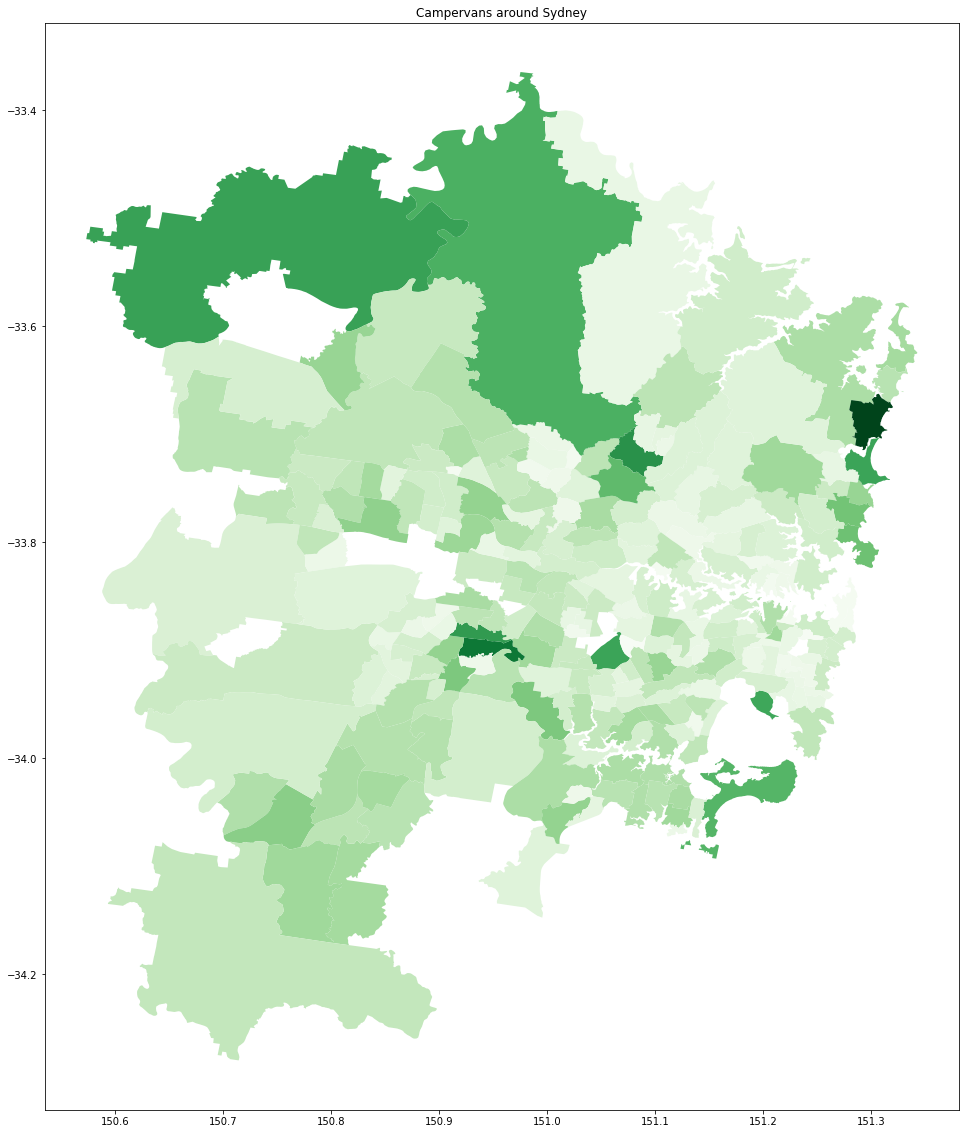

In [21]:
import shapely

plt.rcParams["figure.figsize"] = (40,20)

right_here = shapely.geometry.point.Point(151.2299732, -33.9178754)
final_table["distance_from_UNSW"] = final_table.geometry.distance(right_here)

really_close_burbs = final_table[final_table.distance_from_UNSW<0.5]
really_close_burbs.plot(column='Value', cmap='Greens')
    
plt.title("Campervans around Sydney");

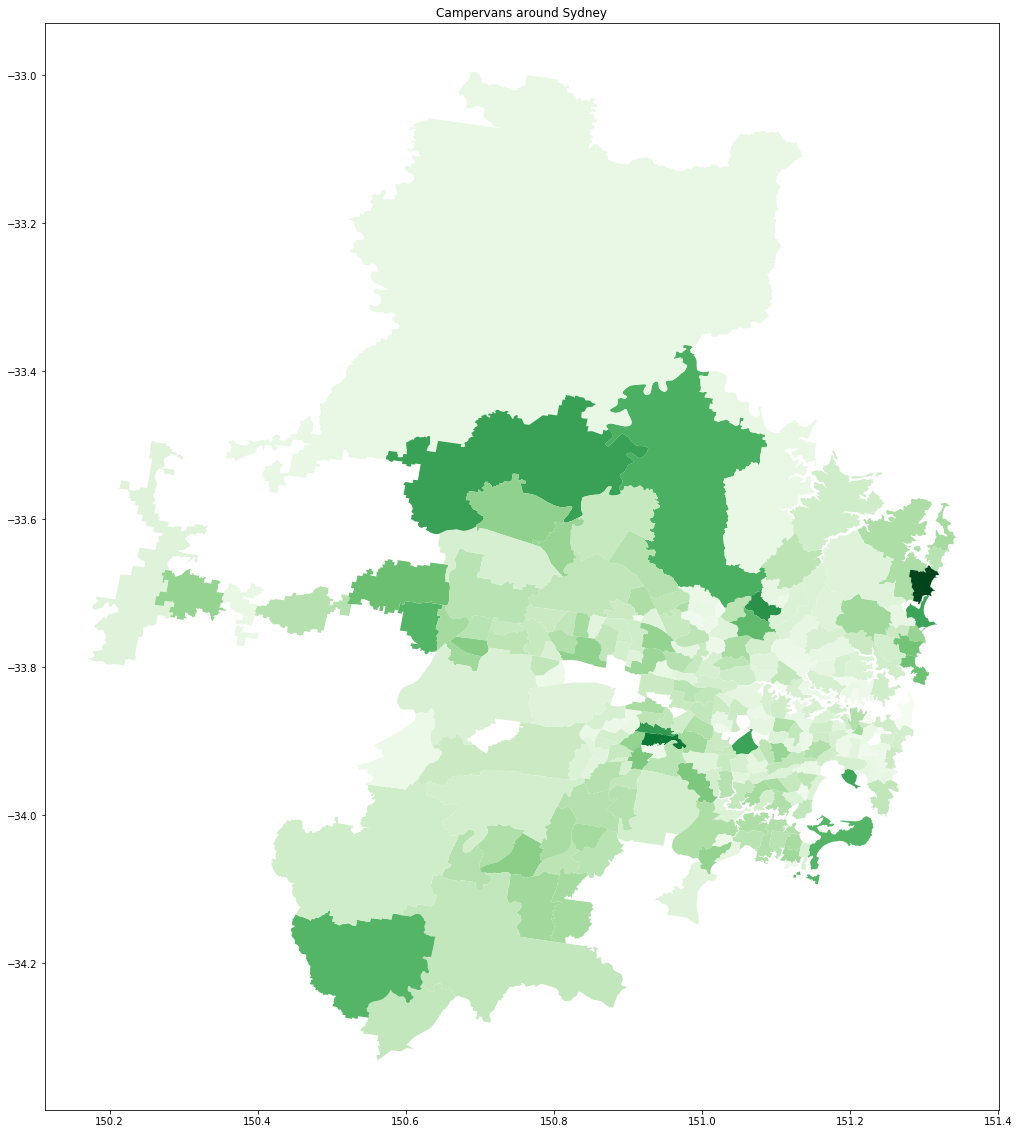

In [18]:
import shapely

plt.rcParams["figure.figsize"] = (40,20)

right_here = shapely.geometry.point.Point(151.2299732, -33.9178754)
final_table["distance_from_UNSW"] = final_table.geometry.distance(right_here)

really_close_burbs = final_table[final_table.distance_from_UNSW<0.065]
final_table.plot(column='Value', cmap='Greens')
    
plt.title("Campervans around Sydney");

In [28]:
final_table.Value.idxmax()

180

In [29]:
final_table.loc[final_table['Value'].idxmax()]

sa2_maincode_2016                                             124021456
geometry              POLYGON ((150.5267630070001 -33.71471600699994...
Time                                                               2016
Value                                                              57.5
Code                                                          124021456
Area                                            Blue Mountains - South 
centroid                   POINT (150.2879512804046 -33.99342565865368)
distance_from_UNSW                                             0.602966
Name: 180, dtype: object

In [30]:
qdf = final_table.drop([180], axis=0)

In [31]:
qdf.loc[qdf['Value'].idxmax()]

sa2_maincode_2016                                             118011342
geometry              POLYGON ((151.2337154470001 -33.88963617099995...
Time                                                               2016
Value                                                              50.5
Code                                                          118011342
Area                                                   Centennial Park 
centroid                    POINT (151.2342531103935 -33.8983611702745)
distance_from_UNSW                                            0.0116502
Name: 58, dtype: object

In [40]:
qdf = final_table.drop([58,180], axis=0)

In [41]:
qdf.loc[qdf['Value'].idxmax()]

sa2_maincode_2016                                             115011554
geometry              POLYGON ((151.0189927360001 -33.71687604799996...
Time                                                               2016
Value                                                              50.3
Code                                                          115011554
Area                                                Castle Hill - East 
centroid                     POINT (151.0241909555199 -33.722426879346)
distance_from_UNSW                                             0.276107
Name: 5, dtype: object

In [42]:
qdf = final_table.drop([58,180,5], axis=0)

In [43]:
qdf.loc[qdf['Value'].idxmax()]

sa2_maincode_2016                                             124011449
geometry              POLYGON ((150.2767896180001 -33.49917994399993...
Time                                                               2016
Value                                                              49.1
Code                                                          124011449
Area                                      Blackheath - Megalong Valley 
centroid                   POINT (150.2455170225261 -33.67384766520153)
distance_from_UNSW                                             0.947228
Name: 173, dtype: object

In [44]:
qdf = final_table.drop([58,180,5,173], axis=0)

In [45]:
qdf.loc[qdf['Value'].idxmax()]

sa2_maincode_2016                                             124011455
geometry              POLYGON ((150.352112989 -33.71381999599998, 15...
Time                                                               2016
Value                                                              49.1
Code                                                          124011455
Area                                                   Wentworth Falls 
centroid                   POINT (150.3797300427459 -33.72168262852624)
distance_from_UNSW                                             0.844639
Name: 179, dtype: object

In [22]:
top10= final_table.nlargest(10, ['Value']) 

In [23]:
top10

,sa2_maincode_2016,geometry,Time,Value,Code,Area,centroid,distance_from_UNSW
142,122021423,POLYGON ((151.3182334600001 -33.67049823199994...,2016,82.0,122021423,Warriewood - Mona Vale,POINT (151.2979369684939 -33.6862812964367),0.212533
234,127021511,POLYGON ((150.9735066920001 -33.90992963399998...,2016,68.0,127021511,Cabramatta - Lansvale,POINT (150.9460595535291 -33.89887987622122),0.250793
122,121021406,"POLYGON ((151.099867794 -33.71533842099996, 15...",2016,60.0,121021406,Normanhurst - Thornleigh - Westleigh,POINT (151.0816406979034 -33.71913210115581),0.226649
236,127021513,"POLYGON ((150.967145691 -33.89014327399997, 15...",2016,57.0,127021513,Canley Vale - Canley Heights,POINT (150.9362618691714 -33.88443746229952),0.264073
14,115031300,POLYGON ((150.8330070220001 -33.59821199799995...,2016,55.0,115031300,Kurrajong Heights - Ebenezer,POINT (150.7486260208563 -33.52719549668296),0.489355
70,119011357,"POLYGON ((151.076503085 -33.90782498199997, 15...",2016,54.0,119011357,Greenacre - Mount Lewis,POINT (151.0584351845856 -33.90438447244718),0.153048
150,122031431,POLYGON ((151.2756471580001 -33.72299100099997...,2016,54.0,122031431,Narrabeen - Collaroy,POINT (151.2938116050142 -33.72935109564684),0.181949
35,117011321,POLYGON ((151.1935344950001 -33.95462108399994...,2016,53.0,117011321,Botany,POINT (151.2006220689764 -33.94909251463477),0.033307
11,115021297,POLYGON ((150.8736811990001 -33.47835834099993...,2016,50.0,115021297,Dural - Kenthurst - Wisemans Ferry,POINT (150.9823147713737 -33.54650564176617),0.267589
165,123031447,POLYGON ((150.5934529960001 -34.13419199999998...,2016,48.0,123031447,Picton - Tahmoor - Buxton,POINT (150.5440977512464 -34.19345277191579),0.639080


In [24]:
top10.set_index("Area",drop=True,inplace=True)

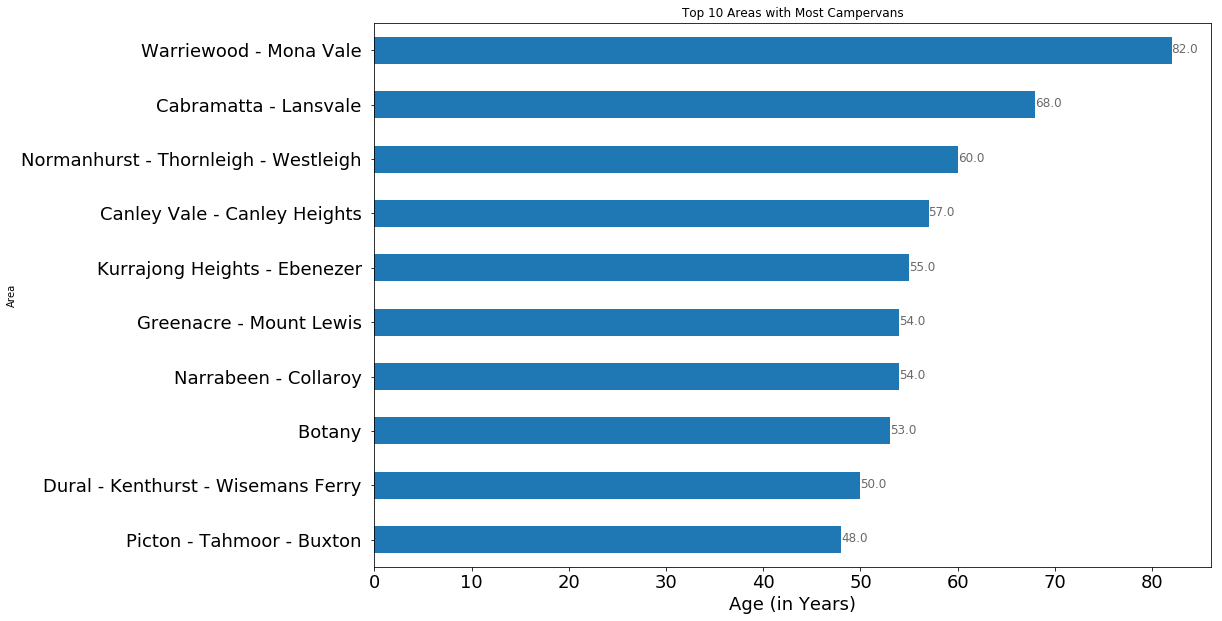

In [26]:
import matplotlib.pyplot as plt
ax = top10['Value'].plot(kind='barh', title ="Top 10 Areas with Most Campervans", figsize=(15, 10), legend=False, fontsize=18)
ax.set_xlabel("Age (in Years)", fontsize=18)
for i in ax.patches:
    ax.text(i.get_width(), i.get_y()+0.3, \
            str(round((i.get_width()), 2)), fontsize=12, color='dimgrey')
ax.invert_yaxis()
plt.show()

In [27]:
bot10= final_table.nsmallest(10, ['Value']) 

In [28]:
bot10

,sa2_maincode_2016,geometry,Time,Value,Code,Area,centroid,distance_from_UNSW
114,120031576,"POLYGON ((151.06876921 -33.88583882399996, 151...",2016,2.0,120031576,Strathfield South,POINT (151.0770117791025 -33.89507694016138),0.141547
58,118011347,POLYGON ((151.2408779880001 -33.88991899799998...,2016,3.0,118011347,Woollahra,POINT (151.243672681557 -33.88679506025486),0.028093
27,116021562,POLYGON ((150.9078869910001 -33.73621400599995...,2016,4.0,116021562,Acacia Gardens,POINT (150.913899867289 -33.7333752147599),0.359947
45,117031333,POLYGON ((151.2125946850001 -33.87375310599999...,2016,4.0,117031333,Potts Point - Woolloomooloo,POINT (151.2240715437093 -33.8701355980203),0.040948
55,118011344,POLYGON ((151.2863331900001 -33.85762467699993...,2016,4.0,118011344,Dover Heights,POINT (151.2797465315996 -33.87105376677908),0.056050
57,118011346,(POLYGON ((151.2815880070001 -33.8331920049999...,2016,4.0,118011346,Rose Bay - Vaucluse - Watsons Bay,POINT (151.2741369986031 -33.85997444703176),0.049392
222,126021590,"POLYGON ((151.096259805 -33.82274742299995, 15...",2016,4.0,126021590,Putney,POINT (151.106296001956 -33.82613632648994),0.144550
5,115011554,POLYGON ((151.0189927360001 -33.71687604799996...,2016,5.0,115011554,Castle Hill - East,POINT (151.0241909555199 -33.722426879346),0.276107
136,121041417,POLYGON ((151.2119109670001 -33.85049318599994...,2016,5.0,121041417,North Sydney - Lavender Bay,POINT (151.2071060930151 -33.8391244819234),0.069761
4,115011553,POLYGON ((150.9842678770001 -33.74086259299997...,2016,6.0,115011553,Castle Hill - Central,POINT (150.9878864003637 -33.73359129225526),0.289596


In [29]:
bot10.set_index("Area",drop=True,inplace=True)

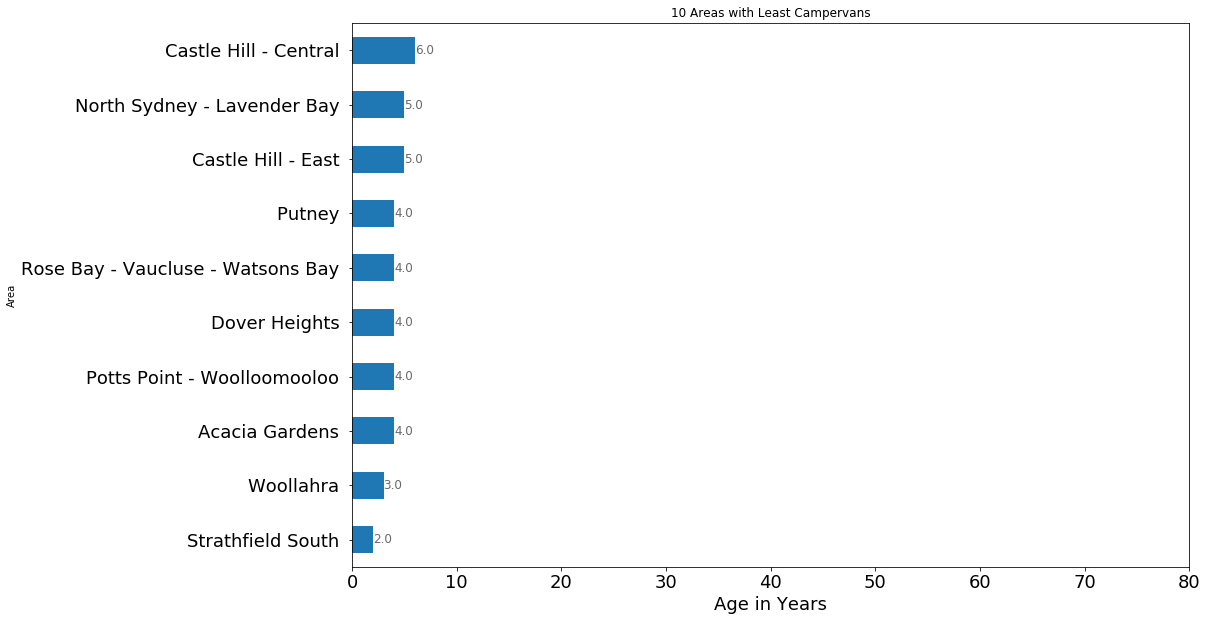

In [31]:
import matplotlib.pyplot as plt
ax = bot10['Value'].plot(kind='barh', title ="10 Areas with Least Campervans", figsize=(15, 10), legend=False, fontsize=18)
ax.set_xlabel("Age in Years", fontsize=18)
ax.set_xticks([0, 10, 20, 30, 40, 50, 60,70, 80])

for i in ax.patches:
    ax.text(i.get_width(), i.get_y()+.18, \
            str(round((i.get_width()), 2)), fontsize=12, color='dimgrey')

plt.show()

In [77]:
final_table.sort_values(by=['Value'], inplace=True)

In [78]:
top50= final_table.nlargest(50, ['Value']) 

In [80]:
top50.set_index("Area",drop=True,inplace=True)

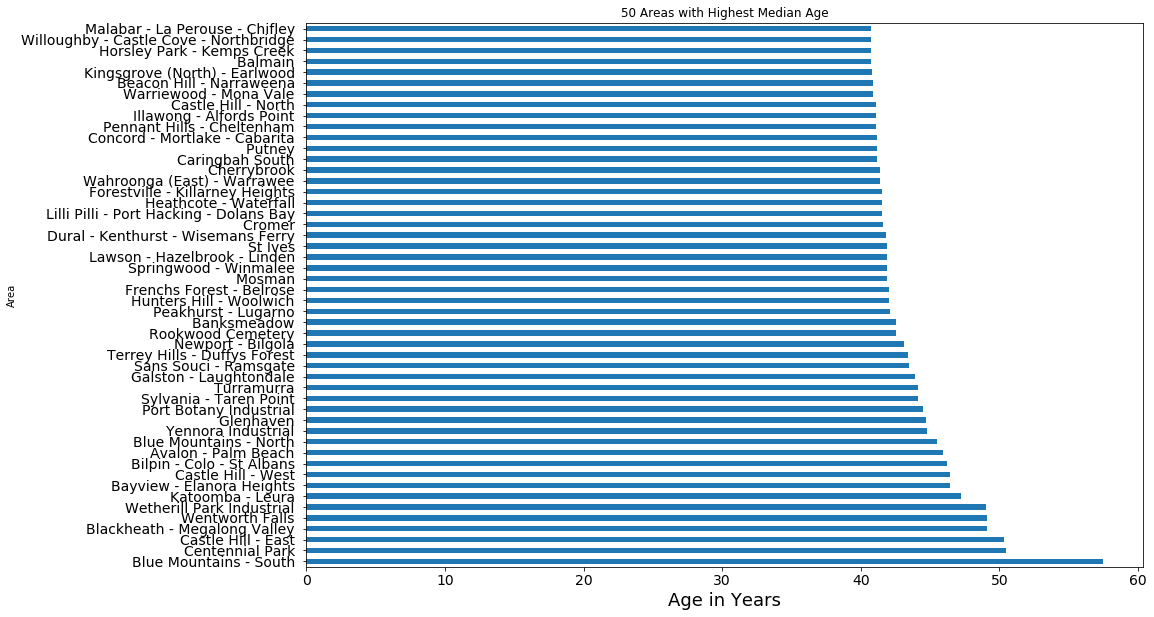

In [82]:
import matplotlib.pyplot as plt
ax = top50['Value'].plot(kind='barh', title ="50 Areas with Highest Median Age", figsize=(15, 10), legend=False, fontsize=14)
ax.set_xlabel("Age in Years", fontsize=18)
plt.show()

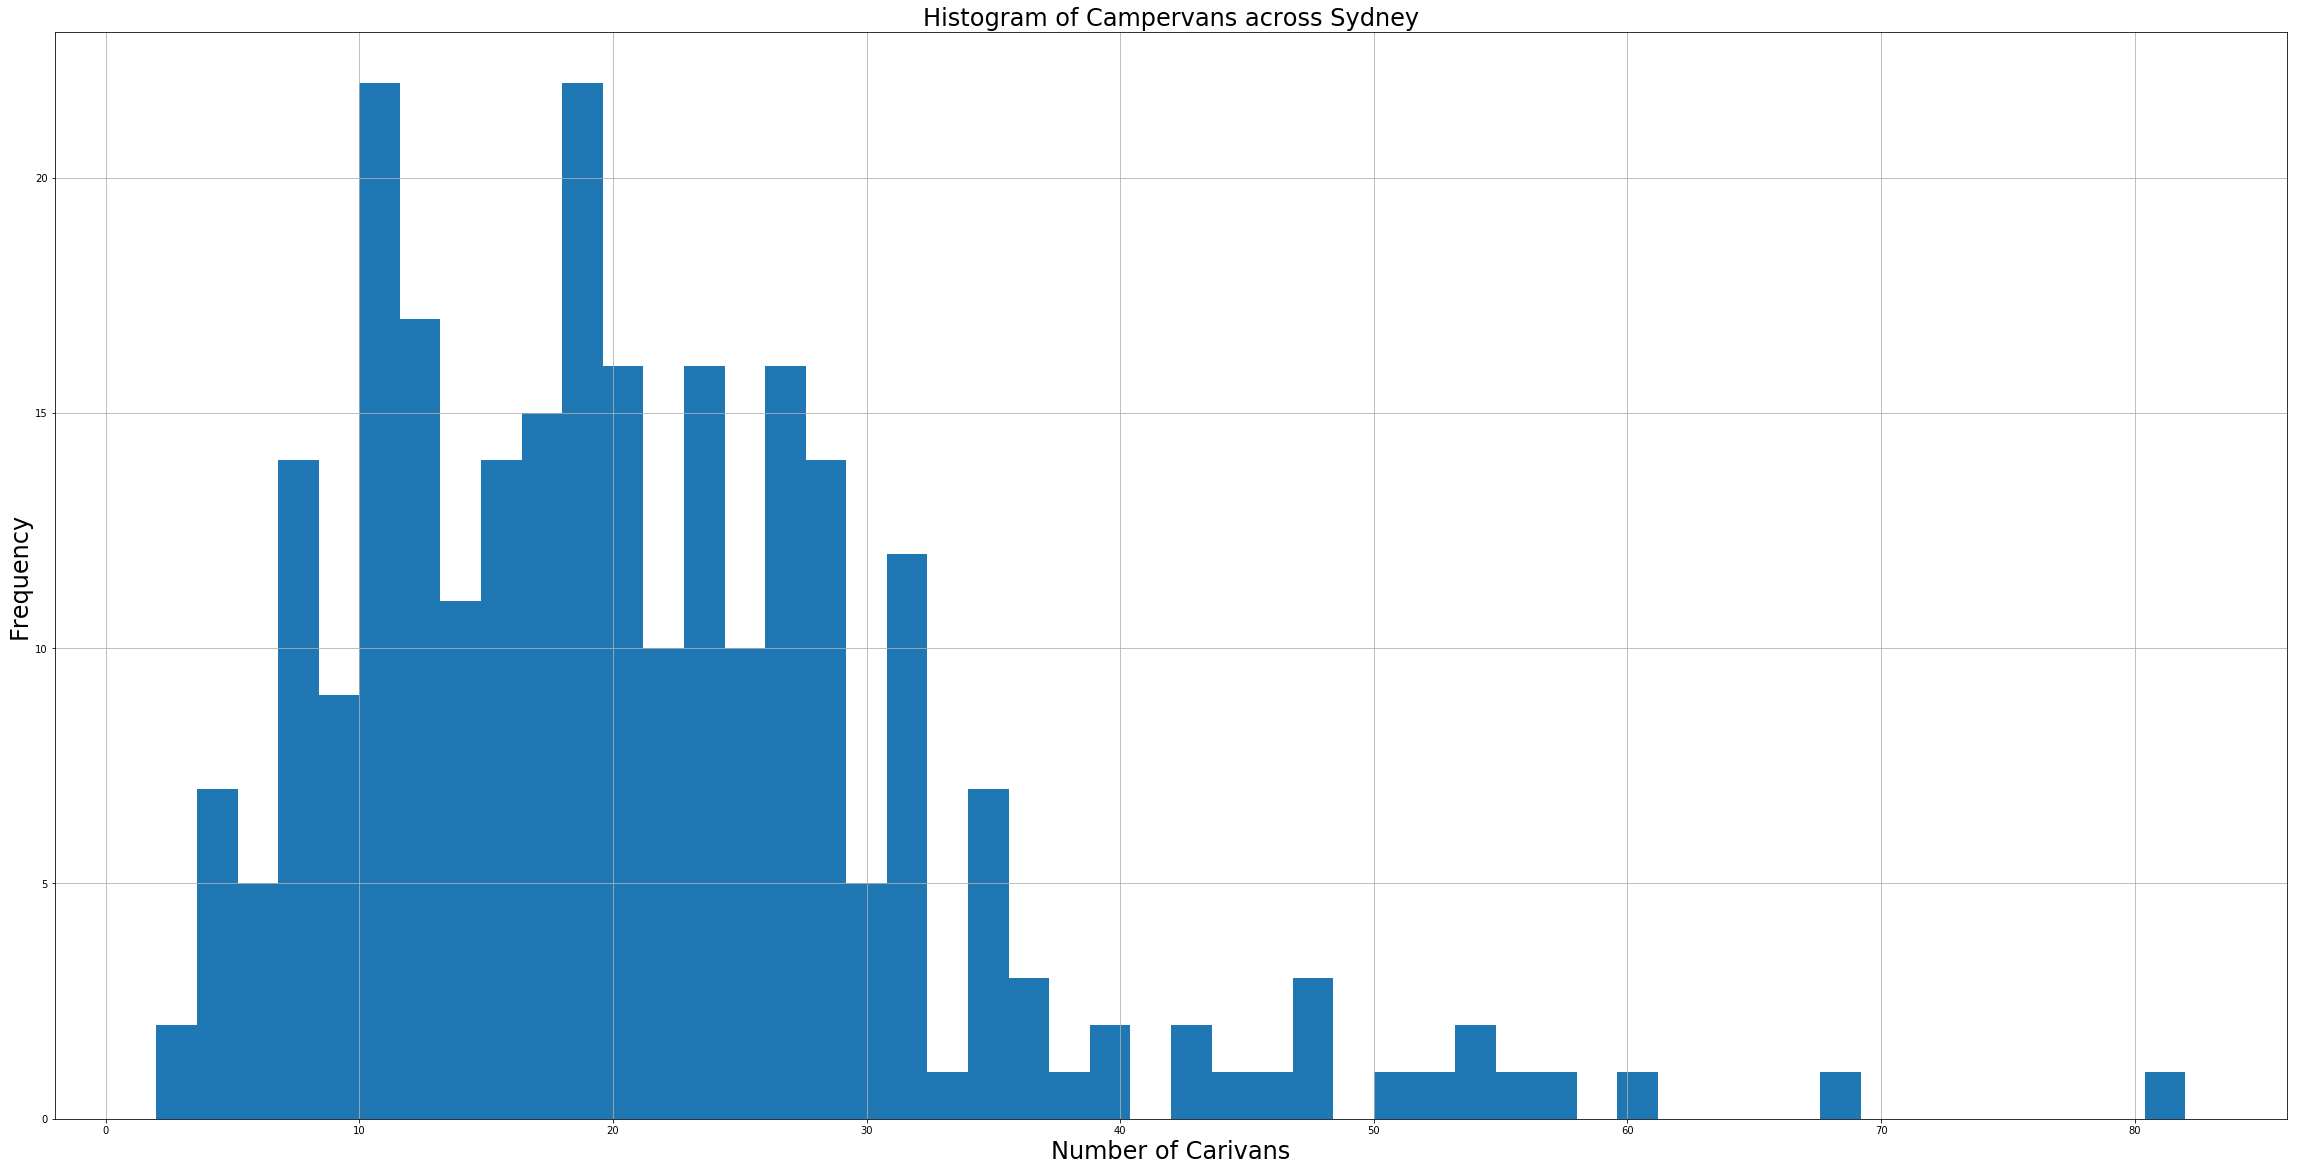

In [34]:
final_table.Value.hist(bins=50)

plt.xlabel("Number of Carivans",fontsize=24)
plt.ylabel("Frequency",fontsize=24)
plt.title("Histogram of Campervans across Sydney",fontsize=24);